# Programming Starter (PRS) – SoSe 2025 - Students Social Media Addiction Analysis
## Team No: 08
- *Alwin Cheeramkuzhiyil Binoy*
- *Saurabh Hemant Tungikar*
- *Hemanthkumar Muthusamy Gunasekaran*

## Libraries Used

- pandas
- numpy  
- matplotlib.pyplot  
- seaborn
- scipy.stats


### Task 1(a)

Loading the dataset from the CSV file and store it in a Pandas DataFrame for analysis.


In [17]:
import pandas as pd

# Loading the dataset
df_all = pd.read_csv("Students-Social-Media-Addiction.csv")

### Task 1(b)

Verifying that the dataset whether it has the expected **number of columns**.  


In [18]:
# Checking number of columns
print("Number of columns:", df_all.shape[1])
print("Column names:", df_all.columns.tolist())

Number of columns: 13
Column names: ['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']


### Task 1(c):Understanding of each column

1. **Timestamp**  
   This tells us the exact date and time when the student filled out the survey.

2. **Age**  
   Shows how old the student is. Most students in the dataset are between 16 and 25 years old.

3. **Gender**  
   The gender the student identifies with — like Male, Female, or Other.

4. **Country**  
   The country the student is from or currently living in.

5. **Class Standing**  
   The student’s level in their studies — like Freshman, Sophomore, Junior, Senior, or Graduate.

6. **Relationship Status**  
   Whether the student is single, in a relationship, married, or something else.

7. **Daily Internet Usage (in hours)**  
   How many hours per day the student uses the internet in general — for studying, watching videos, browsing, etc.

8. **Daily Social Media Usage (in hours)**  
   Part of the total internet time — this shows how much of it is spent specifically on social media apps.

9. **Sleep Time (in hours)**  
   How many hours the student sleeps each night on average.

10. **Physical Activity Time (in hours)**  
    How much time the student spends on physical activities like walking, working out, or playing sports.

11. **Favorite Social Media Platform**  
    The platform the student likes or uses the most — like Instagram, WhatsApp, TikTok, etc.

12. **Do you think you are addicted to social media?**  
    The student’s personal opinion about whether they’re addicted or not.

13. **Do you think social media affects your academic performance?**  
    Whether the student feels their use of social media is having an impact on their studies.


### Task 1(d)

Here we are exploring the dataset by printing **basic statistics** for both numerical and categorical columns. 


In [19]:
# Basic statistics
print("\nNumerical Data Description:")
print(df_all.describe())

print("\nCategorical Data Description:")
print(df_all.describe(include='object'))


Numerical Data Description:
       Student_ID         Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  705.000000  705.000000             705.000000             705.000000   
mean   353.000000   20.659574               4.918723               6.868936   
std    203.660256    1.399217               1.257395               1.126848   
min      1.000000   18.000000               1.500000               3.800000   
25%    177.000000   19.000000               4.100000               6.000000   
50%    353.000000   21.000000               4.800000               6.900000   
75%    529.000000   22.000000               5.800000               7.700000   
max    705.000000   24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
count           705.000000                   705.000000      705.000000  
mean              6.226950                     2.849645        6.436879  
std               1.105055           

### Task 1(e)

Now we are checking for missing or duplicate values in the dataset, handle them appropriately and commenting on the **data quality**.


In [20]:
# Checking for missing and duplicate values
missing_values = df_all.isnull().sum()
duplicates = df_all.duplicated().sum()

print("\nMissing values per column:\n", missing_values)
print(f"\nNumber of duplicate rows: {duplicates}")

# Cleaning the dataset
df_all_cleaned = df_all.drop_duplicates()
df_all_cleaned = df_all_cleaned.dropna()

print("\nNew shape after cleaning:", df_all_cleaned.shape)


Missing values per column:
 Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Number of duplicate rows: 0

New shape after cleaning: (705, 13)


### Task 2(a)

Determining how many **unique countries** are represented in the dataset.


In [21]:
# 'Country' column using it
unique_countries = df_all['Country'].nunique()

# Printing the result
print(f"Number of unique countries : {unique_countries}")


Number of unique countries : 110


### Task 2(b)

Counting the number of respondents per country and visualizing the **top 20 countries** using a **bar chart**.


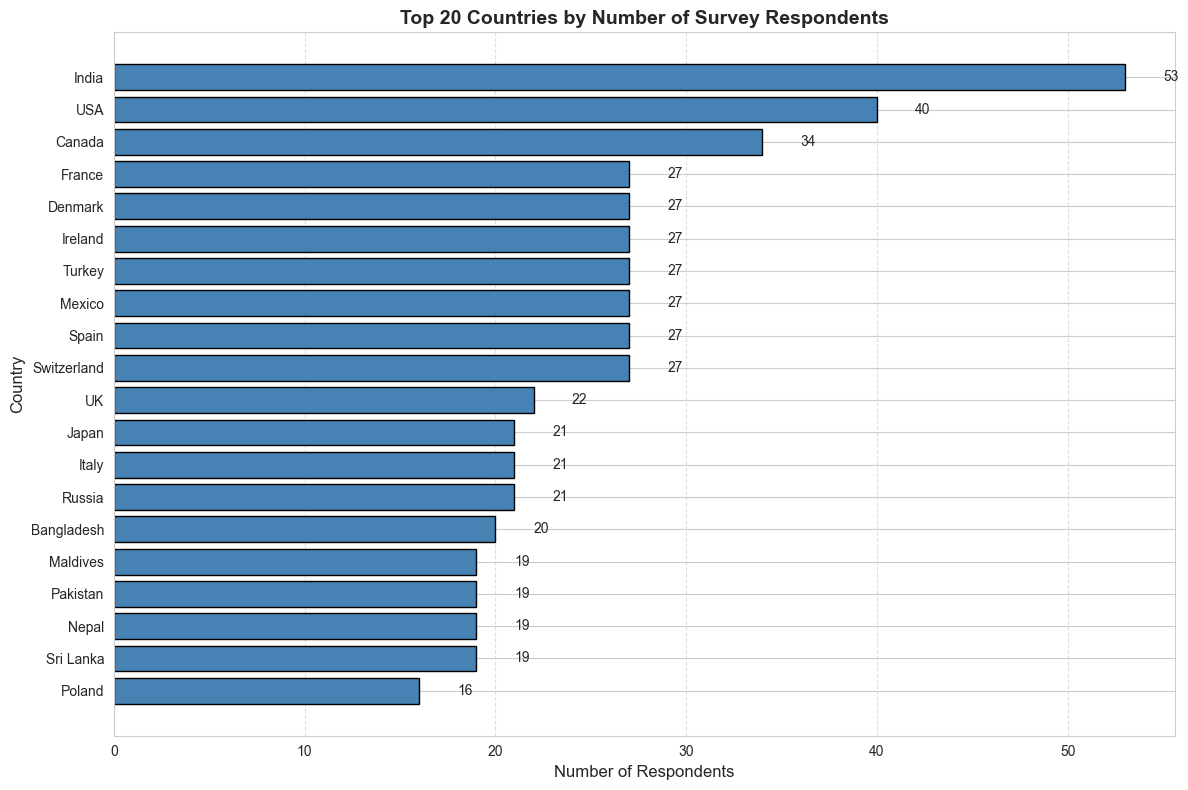

In [22]:
import matplotlib.pyplot as plt

# Counting respondents and take top 20
country_counts = df_all['Country'].value_counts()
top_20_countries = country_counts.head(20).sort_values(ascending=True)  # Plot from smallest to largest for horizontal bar

#Ploting as a horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_countries.index, top_20_countries.values, color='steelblue', edgecolor='black')

#Adding value labels next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', fontsize=10)

#Style the bar chart
plt.title('Top 20 Countries by Number of Survey Respondents', fontsize=14, fontweight='bold')
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Insights from the Bar chart

- India had the highest number of survey participants followed by the USA and Canada, indicating strong representation from these countries.

- Countries such as France, Mexico, and Turkey contributed equally with 27 responses each.


### Task 2(c)

Filtering the dataset to include only countries with more than **one respondent** and create a new DataFrame **df_filtered**.


In [23]:
# Counting the number of responses per country
country_counts = df_all['Country'].value_counts()

#Identifying countries that appear more than once
countries_with_multiple_responses = country_counts[country_counts > 1].index

#Filtering the original dataframe to include only those countries
df_filtered = df_all[df_all['Country'].isin(countries_with_multiple_responses)]

#Displaying the number of rows in the filtered dataframe
print(f"Number of rows in df_filtered (countries with more than one respondent): {df_filtered.shape[0]}")


Number of rows in df_filtered (countries with more than one respondent): 626


### Task 2(d)

Analyzing and visualizing the top **10 countries** with the highest average daily social media usage using a **bar chart**.


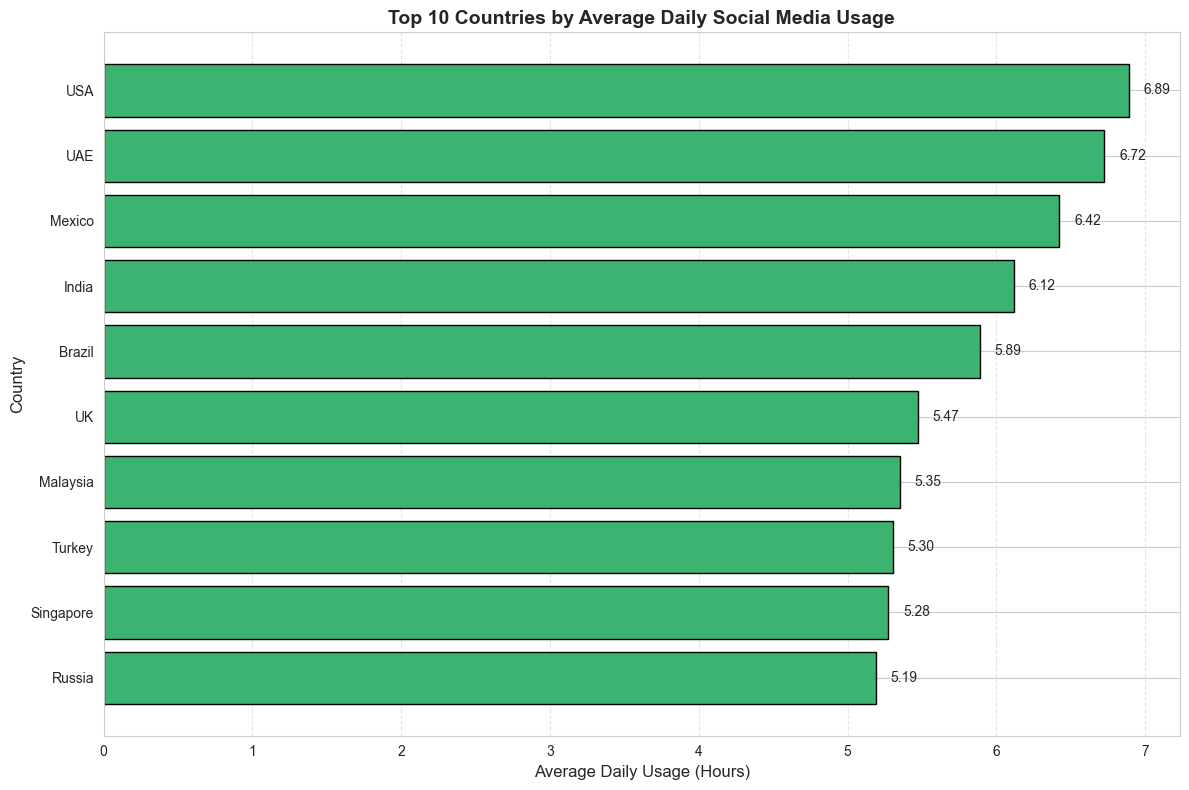

In [24]:
# Group and sort top 10 countries by average usage
avg_social_media_usage = df_filtered.groupby('Country')['Avg_Daily_Usage_Hours'].mean()
top_10_avg_usage = avg_social_media_usage.sort_values(ascending=True).tail(10)  # ascending for horizontal bar

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_avg_usage.index, top_10_avg_usage.values, color='mediumseagreen', edgecolor='black')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center', fontsize=10)

# Style chart
plt.title('Top 10 Countries by Average Daily Social Media Usage', fontsize=14, fontweight='bold')
plt.xlabel('Average Daily Usage (Hours)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Step 5: Show plot
plt.show()


### Insights from the Bar chart
- The **USA, UAE, and Mexico** top the list with the highest average daily social media usage, each exceeding 6 hours per day.

- **India** ranks 4th with an average of **6.12** hours showing that students in these countries are among the heaviest users of social media globally.


### Task 2(e)

Comparing daily social media usage between **India and Germany** using boxplots.


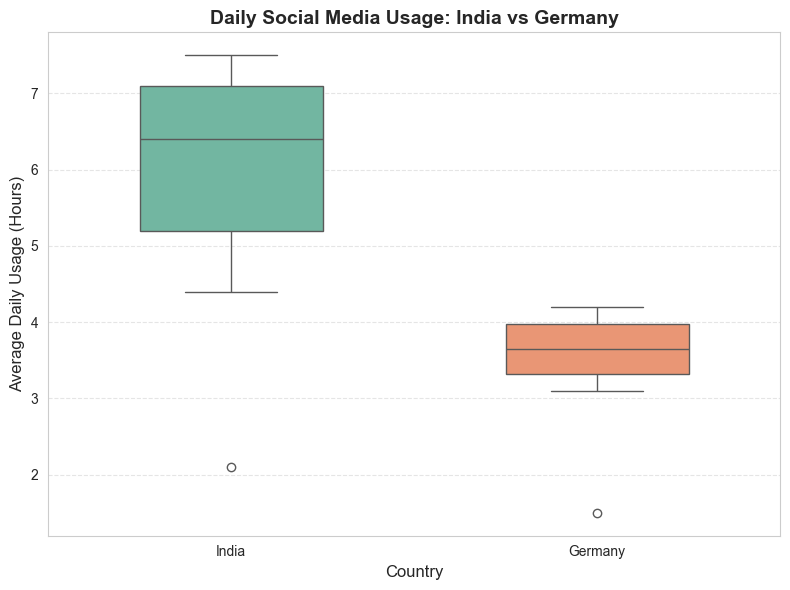

In [25]:
import seaborn as sns
#  Filter for India and Germany
selected_countries = ['India', 'Germany']
df_compare = df_filtered[df_filtered['Country'].isin(selected_countries)]

#the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_compare, x='Country', y='Avg_Daily_Usage_Hours', 
            hue='Country', palette='Set2', width=0.5, legend=False)

#Assigning axes 
plt.title('Daily Social Media Usage: India vs Germany', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Daily Usage (Hours)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


### Insights from the Boxplot Comparison (India vs Germany)
- The **median** daily usage in India is around **6.5 hours**, while in Germany it is closer to **3.5 hours**.
- India also shows a **wider range** of usage, with some percentage of students spending as much as **7+ hours** in a single day.
- Germany’s usage is more **concentrated and consistent**, with most of the students falling between **3 to 4 hours**.
- India’s overall distribution indicates a more intensive and varied social media habit among students.



### Task 2(f)

**Is there a correlation between social media usage and sleep time among students?**

By using social media for prolonged time it may impact a student's daily routine, especially sleep patterns. Analyzing this relationship, we can understand whether longer time spent on social media is associated with reduced sleep.


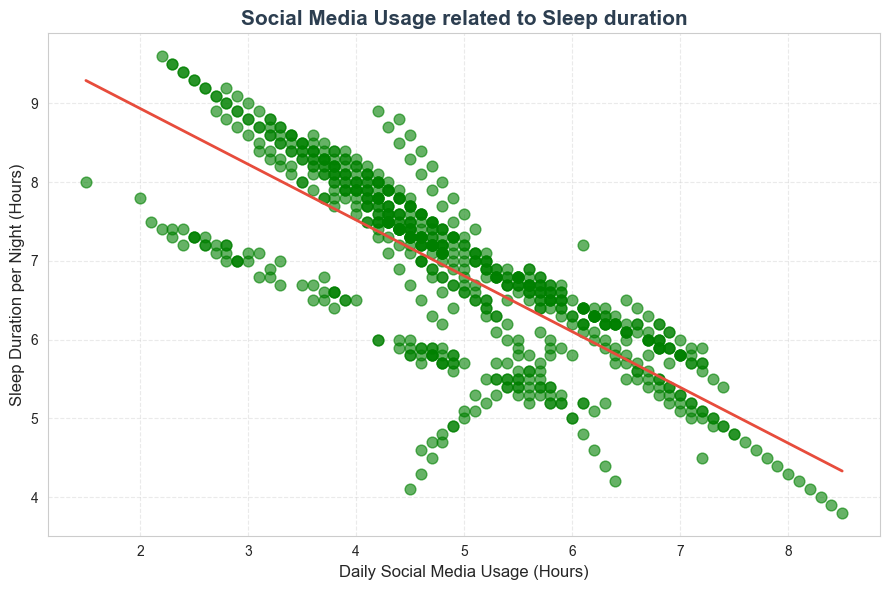

In [26]:
# Cleaning the data and ensure correct types
df_plot = df_all[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night']].copy()
df_plot = df_plot.dropna()
df_plot['Avg_Daily_Usage_Hours'] = df_plot['Avg_Daily_Usage_Hours'].astype('float64')
df_plot['Sleep_Hours_Per_Night'] = df_plot['Sleep_Hours_Per_Night'].astype('float64')

# Plotting
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")

sns.regplot(
    data=df_plot,
    x='Avg_Daily_Usage_Hours',
    y='Sleep_Hours_Per_Night',
    scatter_kws={'alpha': 0.6, 'color': 'green', 's': 60},
    line_kws={'color': '#e74c3c', 'linewidth': 2},
    ci=None
)

#adding font and colors to the plot
plt.title('Social Media Usage related to Sleep duration', fontsize=15, fontweight='bold', color='#2c3e50')
plt.xlabel('Daily Social Media Usage (Hours)', fontsize=12)
plt.ylabel('Sleep Duration per Night (Hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


### Insights from the Plot

1. **There is a clear negative correlation** between social media usage and sleep — as students spend more time on social media, their sleep duration tends to decrease.

2. **Most students using less than 4 hours** of social media get around 7–9 hours of sleep, while those using more than 6 hours often sleep less than 6 hours.

3. The **red regression line shows a downward trend**, indicating that higher screen time may be linked to sleep reduction among students.


### Task 2(g)

Visualizing the most commonly used social media platforms worldwide, grouping rare ones under "Other".


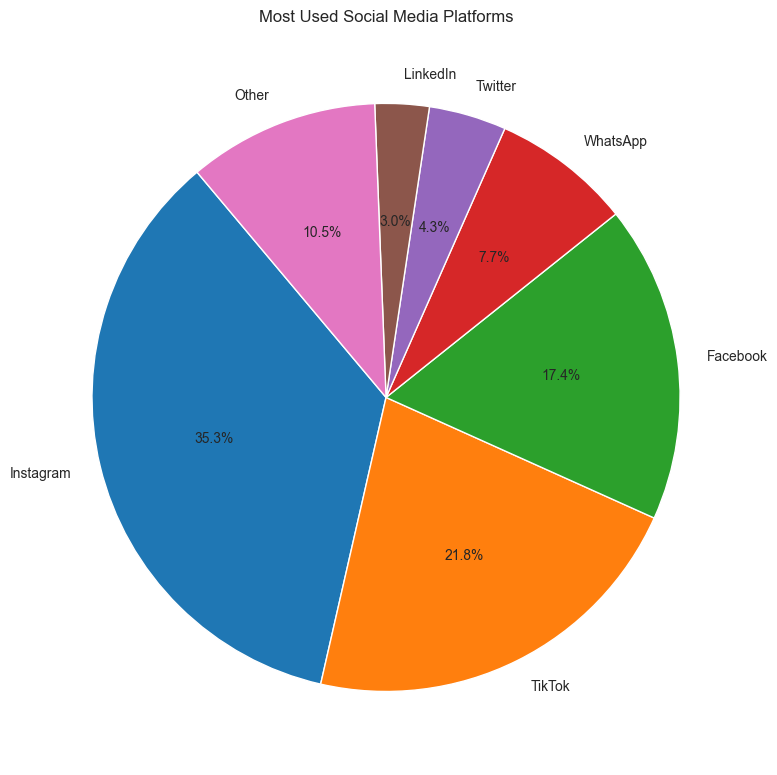

In [27]:
# Count the frequency of each platform
platform_counts = df_all['Most_Used_Platform'].value_counts()

#Separate platforms used at least 20 times
main_platforms = platform_counts[platform_counts >= 20]

#Sum counts for platforms used less than 20 times and label as 'Other'
other_count = platform_counts[platform_counts < 20].sum()

#Add 'Other' to the main platforms
platforms_with_other = main_platforms.copy()
platforms_with_other['Other'] = other_count

#Plot the pie chart
plt.figure(figsize=(8, 8))
platforms_with_other.plot(kind='pie', autopct='%1.1f%%', startangle=130)

#Add title and formatting
plt.title('Most Used Social Media Platforms')
plt.ylabel('')  # Hide default y-label for a cleaner look
plt.tight_layout()
plt.show()

### Insights from the Pie Chart

1. **Instagram and TikTok appear** to be the most used platforms together covering more than 50%.

2. Platforms with fewer than **20 mentions** were grouped under **Other** contribute 10.5% of the total usage.


### Task 2(h)

Comparing the usage of platform **globally** and in our **home country** using side-by-side pie charts, and describing the insights.


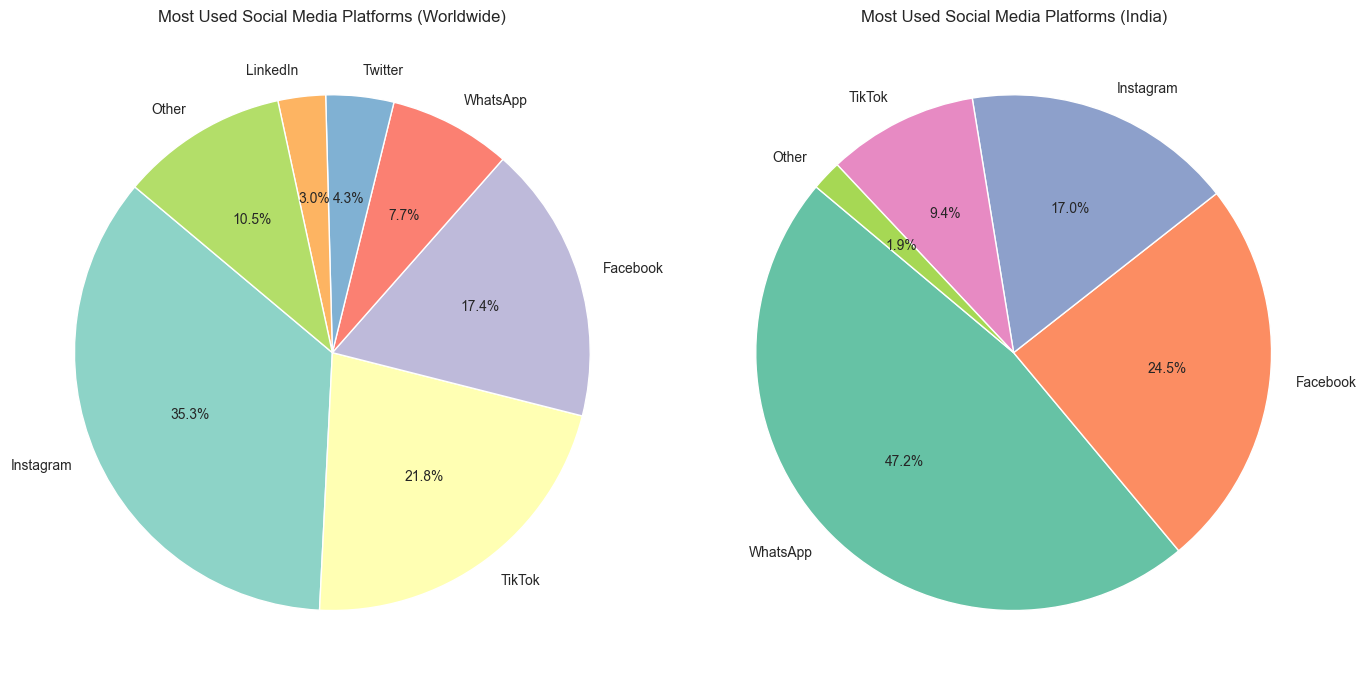

In [28]:
# Filter the dataset for India
india_data = df_all[df_all['Country'] == 'India']
india_counts = india_data['Most_Used_Platform'].value_counts()

# Keep selected platforms and group the rest as "Other"
india_display = ['WhatsApp', 'Instagram', 'Facebook', 'TikTok']
india_main = india_counts[india_counts.index.isin(india_display)]
india_other = india_counts[~india_counts.index.isin(india_display)].sum()

# Add "Other" to India's data
india_final = india_main.copy()
india_final['Other'] = india_other

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# Global pie chart
axes[0].pie(platforms_with_other, labels=platforms_with_other.index, autopct='%1.1f%%',
            startangle=140, colors=plt.cm.Set3.colors)
axes[0].set_title('Most Used Social Media Platforms (Worldwide)')

# India pie chart
axes[1].pie(india_final, labels=india_final.index, autopct='%1.1f%%',
            startangle=140, colors=plt.cm.Set2.colors)
axes[1].set_title('Most Used Social Media Platforms (India)')

plt.tight_layout()
plt.show()


### Insights from the Side-by-Side Pie Charts

1. **WhatsApp** is the most dominant platform in India accounting for nearly half of all student preferences while globally Instagram holds the top spot.

2. **Instagram and TikTok** together dominate the global usage showing a stronger presence worldwide compared to their share among Indian students.

3. **WhatsApp, Facebook, Instagram** taking up most of the chart — indicating limited diversity compared to global patterns.


## Task 3 

1. **Research Question**  
   Do male and female students use different social media platforms or spend different amounts of time on them?

2. **Background and Motivation**
   Gender-based behavioral analysis is a vital subject in academic research plus product design. We examined average social media usage as well as platform preferences when they do vary by gender. This examination allows us to understand different digital habits with potential overuse risks and allows for targeted education or intervention strategies.

3. **We perform the following Analysis**
   - **Boxplot** of average daily social media usage by gender  
   - **Mean and median** annotations on the plot to highlight central tendencies 
   - **T-test** to statistically evaluate differences in usage hours between male and female student
   - **Histogram** of daily usage per gender   

### Boxplot Analysis and Mean and median

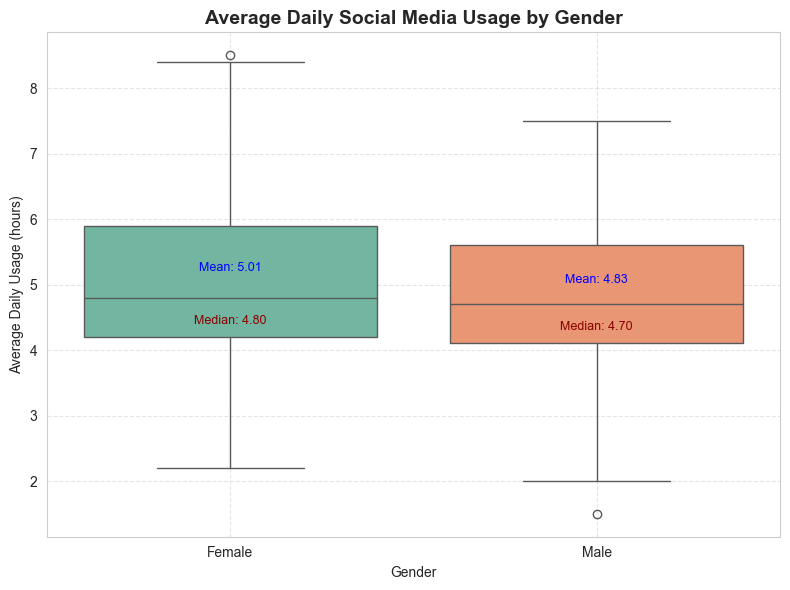

In [29]:
# Cleaning and filtering data
df_all['Gender'] = df_all['Gender'].str.strip().str.capitalize()
df_gender = df_all.dropna(subset=['Gender', 'Most_Used_Platform', 'Avg_Daily_Usage_Hours'])

# Computing mean and median by gender
group_stats = df_gender.groupby('Gender')['Avg_Daily_Usage_Hours'].agg(['mean', 'median'])

# the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_gender, x='Gender', y='Avg_Daily_Usage_Hours',
            hue='Gender', palette='Set2', dodge=False, legend=False)

for i, gender in enumerate(group_stats.index):
    # Getting the the mean and median usage values
    mean_val = group_stats.loc[gender, 'mean']
    median_val = group_stats.loc[gender, 'median'] 
    # Adding the mean label above
    plt.text(i, mean_val + 0.2, f"Mean: {mean_val:.2f}", ha='center', color='blue', fontsize=9)
    # Adding the median label below
    plt.text(i, median_val - 0.4, f"Median: {median_val:.2f}", ha='center', color='darkred', fontsize=9)

#Plotting
plt.title('Average Daily Social Media Usage by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Average Daily Usage (hours)')
plt.xlabel('Gender')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("boxplot.png", dpi=300, bbox_inches='tight')
plt.show()




**Insights**

The boxplot showed that both male and female students have a wide spread in their average daily usage. However:

- The **median** usage for females was slightly higher than that of males.
- The **mean** usage was also higher for females, suggesting a tendency toward more frequent or longer social media sessions.
- Females showed a larger number of high-usage outliers.

 **Mean and Median**
| Gender | Mean Usage (hrs) | Median Usage (hrs) |
|--------|------------------|--------------------|
| Male   |       4.83       |      4.70          |
| Female |       5.01       |      4.80          |

### Usage of Social Media platform per Gender

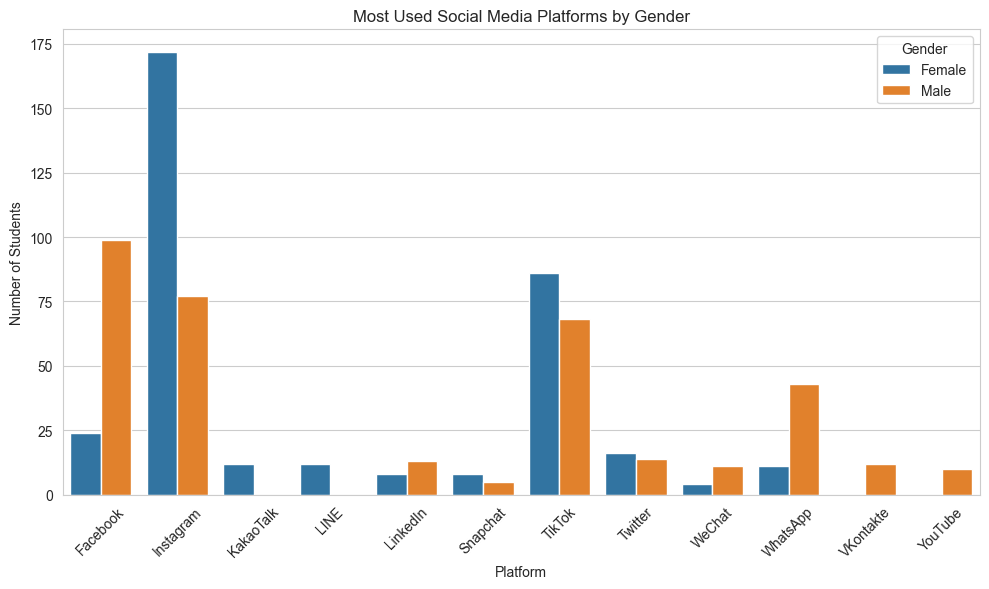

In [30]:
# Counting of each platform per gender
platform_gender = df_gender.groupby(['Gender', 'Most_Used_Platform']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_gender, x='Most_Used_Platform', y='Count', hue='Gender')
plt.xticks(rotation=45)
plt.title('Most Used Social Media Platforms by Gender')
plt.xlabel('Platform')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig("barchart.png", dpi=300, bbox_inches='tight')
plt.show()


### T-test

In [31]:
from scipy.stats import ttest_ind
# Filtering only Male and Female 
df_binary = df_gender[df_gender['Gender'].isin(['Male', 'Female'])]

# Extracting usage hours
male_usage = df_binary[df_binary['Gender'] == 'Male']['Avg_Daily_Usage_Hours']
female_usage = df_binary[df_binary['Gender'] == 'Female']['Avg_Daily_Usage_Hours']

# Performing two-sided t-test
t_stat, p_val = ttest_ind(male_usage, female_usage, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")


T-statistic: -1.957
P-value: 0.0508
The difference is not statistically significant.


**Understanding and Insights**
A two-sided independent samples t-test was conducted to compare male and female usage patterns.

- **T-statistic:** -1.957  
- **P-value:** 0.0508  

Since the p-value was **greater than 0.05, we conclude that the difference in average daily usage between male and female students is **not statistically significant**.


### Histogram with KDE of daily usage per gender

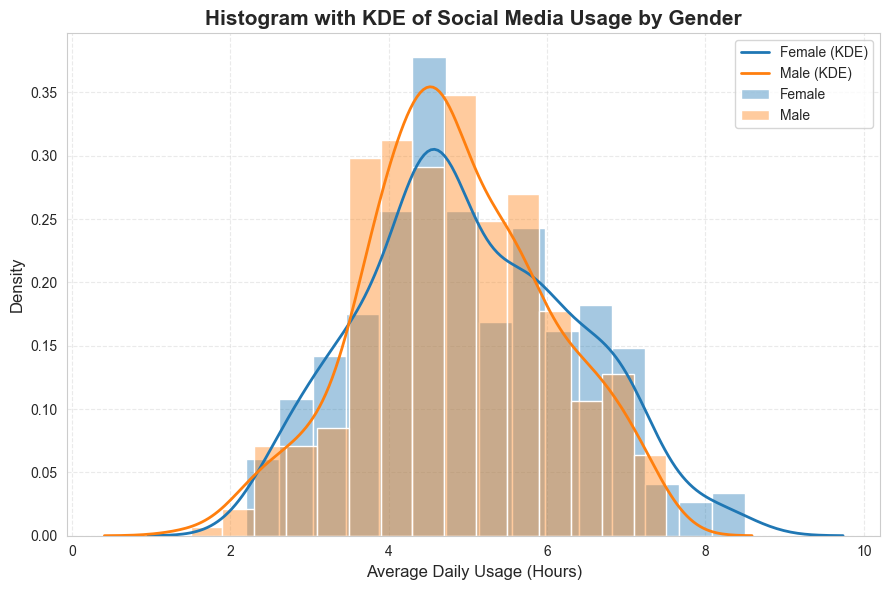

In [32]:
sns.set_style("whitegrid")
colors = plt.get_cmap('tab10').colors

plt.figure(figsize=(9, 6))
genders = df_gender['Gender'].unique()

for i, gender in enumerate(genders):
    subset = df_gender[df_gender['Gender'] == gender]
    
    # Histogram PLOT
    sns.histplot(
        data=subset,
        x='Avg_Daily_Usage_Hours',
        bins=15,
        stat='density',
        element='bars',
        fill=True,
        alpha=0.4,
        color=colors[i % len(colors)],
        label=gender
    )
    
    #Kernel Density Estimate 
    sns.kdeplot(
        data=subset,
        x='Avg_Daily_Usage_Hours',
        color=colors[i % len(colors)],
        linewidth=2,
        label=f"{gender} (KDE)"
    )

# Ploting and styling
plt.title('Histogram with KDE of Social Media Usage by Gender', fontsize=15, fontweight='bold')
plt.xlabel('Average Daily Usage (Hours)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title=None) 
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("histogram.png", dpi=300, bbox_inches='tight')
plt.show()


**Conclusion**

While both of the genders have a similar central tendency (peak), female students vary even more and exhibit more high-usage behavior more often.

This supports the idea about females being more likely than males to engage in extended social media use. The boxplot as well as t-test results align with this idea because they indicate higher mean usage among female
